(60000, 28, 28)


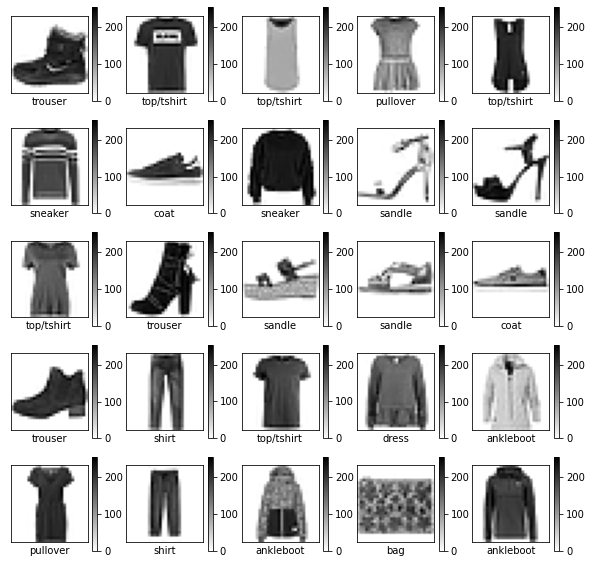

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4981 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3762 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3375 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3120 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2971 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2823 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2700 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2610 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2488 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.241

In [ ]:
#@title Default title text
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist=keras.datasets.fashion_mnist#importing the dataset"""
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()#loading the dataset as training and test data"""
class_names=["top/tshirt","shirt","sneaker","pullover","ankleboot","sandle","dress","coat","bag","trouser"]#assigning the class labels"""
plt.figure(figsize=(10,10))
print(train_images.shape)
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[train_labels[i]])
  plt.colorbar()
plt.show()
train_images=train_images/255.0#inorder to perform data transformation b/w 0to 1"""
test_images=test_images/255.0
model=keras.Sequential([  #retreiving the data sequentially"""
    keras.layers.Flatten(input_shape=(28,28)),#converting the matrix into a single array"""
    keras.layers.Dense(128,activation=tf.nn.relu),#inorder to activvate themodel a relu{REctified Linear Unit:0 to +infinity} grapgh is taken"""
    keras.layers.Dense(10,activation=tf.nn.softmax)# Softmax is often used as the activation for the last layer of a classification network 
    #because the result could be interpreted as a probability distribution."""
    ])
model.compile(optimizer="adam",#Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent(less memory adn efficient)
#gradient descent:optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient
              loss="sparse_categorical_crossentropy",#produces a category index of the most likely matching category.
              metrics=["accuracy"])#groups layers into an object with training and inference features."""
model.fit(train_images,train_labels,epochs=10)#The model is updated each time a batch is processed, which means that it can be updated multiple times during one epoch."

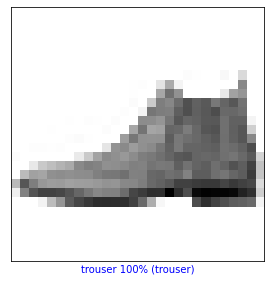

In [ ]:

def plot_image(i,predictions_array,true_label,img):
  predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
  plt.grid(False)#to make the grids invisible
  plt.xticks([])#Get or set the current tick locations(Ticks are the values used to show specific points on the coordinate axis.) and labels of the x-axis.
  plt.yticks([])#same with y cordinate
  plt.imshow(img,cmap=plt.cm.binary)#Display data as an image, i.e., on a 2D regular raster.
  predicted_label=np.argmax(predictions_array)#The Colormap instance or registered colormap name 
  #used to map scalar data to colors. This parameter is ignored for RGB(A) data.
  if true_label==predicted_label:
    color="blue"
  else:
    color="red"
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),
                                       color=color)#to show how to represent x axis
predictions=model.predict(test_images)#passing to predict
i=0
plt.figure(figsize=(10,10))#to set the output figure size
plt.subplot(1,2,1)#Subplots mean a group of smaller axes (where each axis is a plot) that can exist together within a single figure.
plot_image(i,predictions,test_labels,test_images)#to print the image